# **Project Name**    -   Uber Supply–Demand Gap Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Peritosh Sinha

# **Project Summary -**

This project focuses on performing an Exploratory Data Analysis (EDA) on an Uber ride request dataset to identify supply–demand gaps and operational inefficiencies. The dataset contains ride request information such as pickup location, driver assignment, request status, and timestamps. The primary objective of this analysis is to understand ride request patterns, driver availability, and factors contributing to ride cancellations or unfulfilled requests.

The analysis begins with understanding the dataset structure, identifying data types, and examining missing and duplicate values. Initial observations revealed that certain ride requests were not completed due to unavailability of drivers, especially during peak hours and at specific pickup points such as the airport. Datetime features were extracted from the request and drop timestamps to analyze hourly and daily trends in demand.

Data wrangling steps included handling missing values in the drop timestamp for incomplete rides, converting timestamp columns into proper datetime formats, and creating new derived variables such as request hour and request day. These transformations enabled deeper time-based analysis.

Multiple visualizations were created following the UBM (Univariate, Bivariate, Multivariate) framework. Univariate analysis highlighted the distribution of ride statuses and pickup points. Bivariate analysis revealed significant demand-supply mismatches during certain hours and locations, particularly at the airport during late nights and early mornings. Multivariate analysis further confirmed correlations between pickup point, time of request, and ride completion status.

The insights gained from this EDA provide actionable business recommendations, such as increasing driver availability during peak hours, implementing dynamic driver allocation strategies, and offering incentives for drivers to operate in high-demand zones. Overall, this project demonstrates how data-driven decision-making can improve operational efficiency and customer satisfaction in ride-hailing services.

# **GitHub Link -**

https://github.com/Peritosh/Uber_Ride_-_Demand_Analysis

# **Problem Statement**


* Uber experiences operational inefficiencies due to a mismatch between ride demand and driver availability.

* This imbalance is more prominent during certain times and locations, leading to ride cancellations and unfulfilled requests.

* These issues negatively impact service reliability and customer satisfaction.

* Identifying when and where demand–supply gaps occur is essential for improving operational efficiency.

#### **Business Objective?**

To identify supply–demand gaps in Uber ride requests by analyzing pickup locations, request timings, and ride status, and to provide data-driven recommendations for improving driver allocation.

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv(r"D:\Web_mentix_Internship\First_Minor_Project\Uber Request Data.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Number of rows - {df.shape[0]}")
print(f"Number of columns - {df.shape[1]}")

Number of rows - 6745
Number of columns - 6


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"Request id duplicated value : {df["Request id"].duplicated().sum()}")
print(f"Pickup point duplicated value : {df["Pickup point"].duplicated().sum()}")
print(f"Driver id  duplicated value : {df["Driver id"].duplicated().sum()}")
print(f"Status duplicated value : {df["Status"].duplicated().sum()}")
print(f"Request timestamp : {df["Request timestamp"].duplicated().sum()}")
print(f"Drop timestamp duplicated value : {df["Drop timestamp"].duplicated().sum()}")

Request id duplicated value : 0
Pickup point duplicated value : 6743
Driver id  duplicated value : 6444
Status duplicated value : 6742
Request timestamp : 2729
Drop timestamp duplicated value : 4462


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

<Axes: >

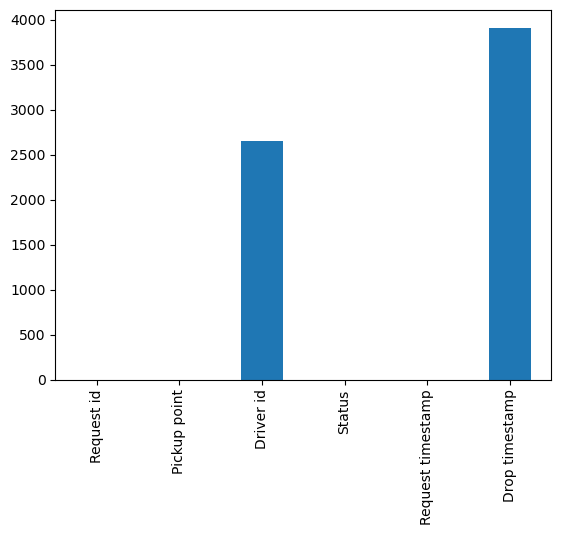

In [9]:
# Visualizing the missing values
df.isnull().sum().plot(kind="bar")

### What did you know about your dataset?

* The dataset contains 6 columns and 6,745 rows.
* It includes Uber ride request records.
* The data captures information such as pickup points, driver assignment, ride status, and timestamps.
* The dataset contains categorical, identifier, and datetime variables.
* Some records have missing drop timestamps due to ride cancellations or unavailability of drivers.
* These missing values represent expected behavior in ride-hailing operations.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

| Variable Name     | Description                                               | Data Type   | Role                 |
| ----------------- | --------------------------------------------------------- | ----------- | -------------------- |
| Request id        | Unique identifier for each ride request                   | Categorical | Identifier           |
| Pickup point      | Location from where the ride was requested (City/Airport) | Categorical | Feature              |
| Driver id         | Unique identifier assigned to each driver                 | Categorical | Identifier / Feature |
| Status            | Outcome of the ride request                               | Categorical | Target               |
| Request timestamp | Date and time when the ride was requested                 | Datetime    | Feature              |
| Drop timestamp    | Date and time when the ride was completed                 | Datetime    | Feature              |


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(f"Request id unique values : {df["Request id"].unique()}")
print(f"Pickup point unique values : {df["Pickup point"].unique()}")
print(f"Driver id unique values : {df["Driver id"].unique()}")
print(f"status unique values : {df["Status"].unique()}")
print(f"Request timestamp unique values : {df["Request timestamp"].unique()}")
print(f"Drop timestamp unique values : {df["Drop timestamp"].unique()}")

Request id unique values : [ 619  867 1807 ... 6751 6754 6753]
Pickup point unique values : ['Airport' 'City']
Driver id unique values : [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [14]:
#Changed the datatypes of Request timestamp and Drop timestamp to datetime from object
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [15]:
#Created three new columns
df['request_hour'] = df['Request timestamp'].dt.hour
df['request_day'] = df['Request timestamp'].dt.day_name()
df['ride_duration_min'] = ((df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   request_hour       6745 non-null   int32         
 7   request_day        6745 non-null   object        
 8   ride_duration_min  2831 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(3)
memory usage: 448.0+ KB


In [16]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
 6   request_hour       6745 non-null   int32         
 7   request_day        6745 non-null   object        
 8   ride_duration_min  2831 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(3)
memory usage: 448.0+ KB


,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day,ride_duration_min
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Wednesday,52.0


### What all manipulations have you done and insights you found?

* Timestamp columns were converted to datetime format to support time-based analysis.

* Categorical variables were standardized to ensure consistency.

* New features such as request hour, request day, and ride duration were created to analyze demand patterns and trip behavior.

* Meaningful missing values were retained, as they represent real operational scenarios.

* These preprocessing steps prepared the dataset for effective exploratory data analysis (EDA).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

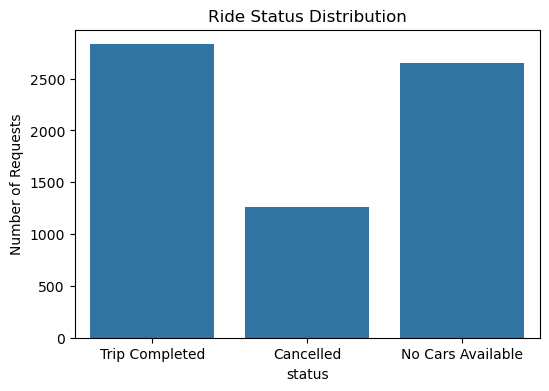

In [17]:
# Chart - 1 visualization code
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='status')
plt.title("Ride Status Distribution")
plt.xlabel("status")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is suitable to compare the frequency of different ride statuses.

##### 2. What is/are the insight(s) found from the chart?

A significant number of ride requests are not completed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative impact as failed rides indicate supply–demand mismatch and loss of revenue

#### Chart - 2

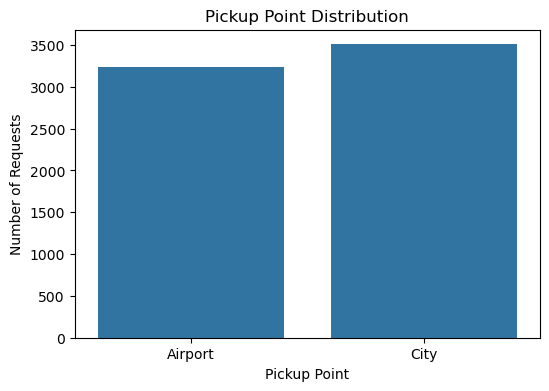

In [18]:
# Chart - 2 visualization code
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pickup_point')
plt.title("Pickup Point Distribution")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To compare demand between City and Airport pickup locations.

##### 2. What is/are the insight(s) found from the chart?

City pickup requests are higher than Airport requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps prioritize driver deployment in high-demand areas.

#### Chart - 3

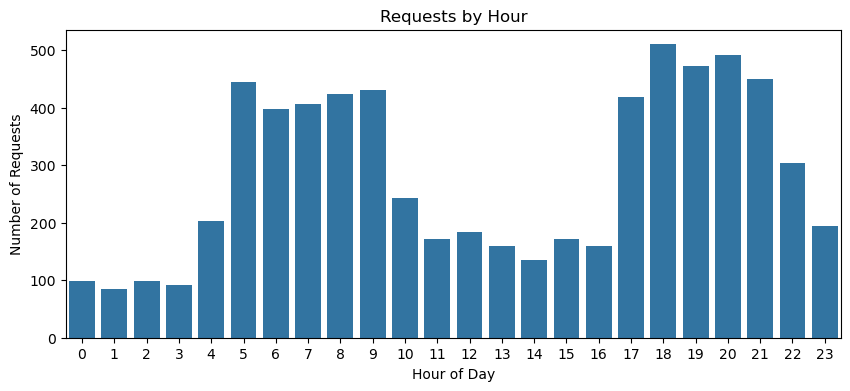

In [81]:
# Chart - 3 visualization code
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='request_hour')
plt.title("Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To identify peak demand hours.

##### 2. What is/are the insight(s) found from the chart?

Demand peaks during certain morning and evening hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact by allowing better driver scheduling during peak hours.

#### Chart - 4

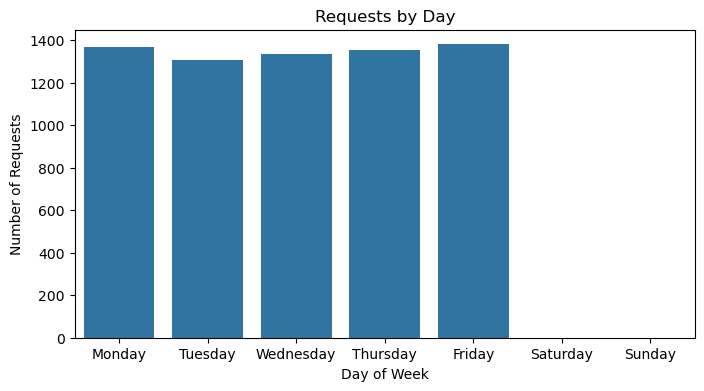

In [82]:
# Chart - 4 visualization code
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='request_day',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title("Requests by Day")
plt.xlabel("Day of Week")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To analyze weekly demand patterns.

##### 2. What is/are the insight(s) found from the chart?

Weekdays have higher demand than weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in weekly workforce planning.

#### Chart - 5

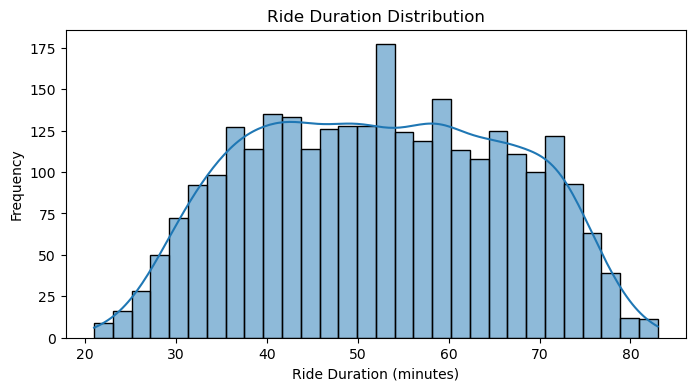

In [83]:
# Chart - 5 visualization code
plt.figure(figsize=(8,4))
sns.histplot(df['ride_duration_min'].dropna(), bins=30, kde=True)
plt.title("Ride Duration Distribution")
plt.xlabel("Ride Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram is ideal for understanding numerical distributions.

##### 2. What is/are the insight(s) found from the chart?

Most rides fall within a moderate duration range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for fare estimation and detecting abnormal trips.

#### Chart - 6

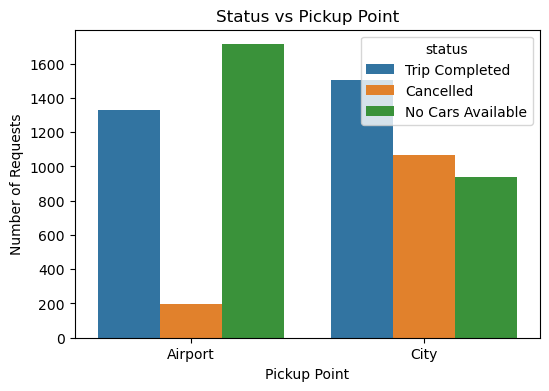

In [85]:
# Chart - 6 visualization code
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pickup_point', hue='status')
plt.title("Status vs Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To compare ride outcomes across pickup locations.

##### 2. What is/are the insight(s) found from the chart?

Airport pickups show a higher failure rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative impact; airport supply needs improvement.

#### Chart - 7

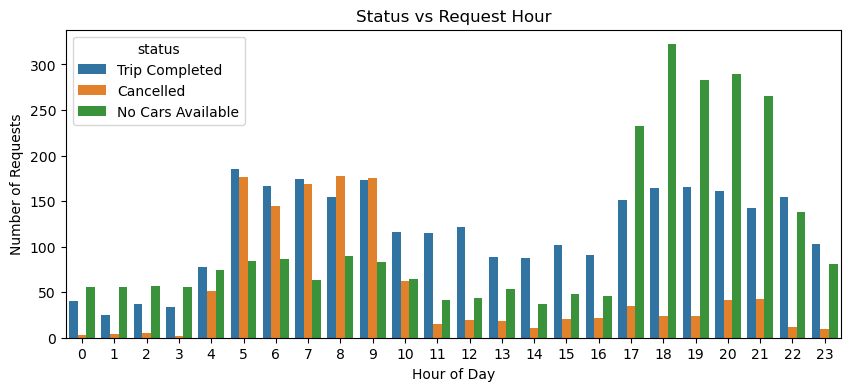

In [87]:
# Chart - 7 visualization code
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='request_hour', hue='status')
plt.title("Status vs Request Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To analyze ride outcomes across different times.

##### 2. What is/are the insight(s) found from the chart?

Late-night hours have more failed requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Driver incentives can reduce failures during these hours.

#### Chart - 8

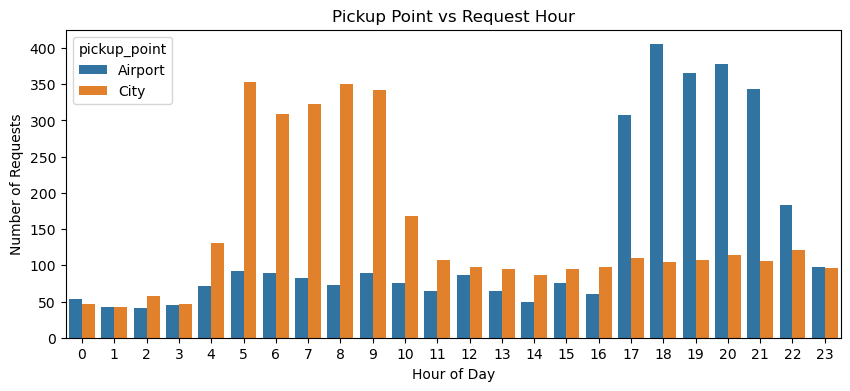

In [88]:
# Chart - 8 visualization code
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='request_hour', hue='pickup_point')
plt.title("Pickup Point vs Request Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To compare hourly demand between locations.

##### 2. What is/are the insight(s) found from the chart?

Airport demand peaks early morning and late night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps plan airport-specific driver availability.

#### Chart - 9

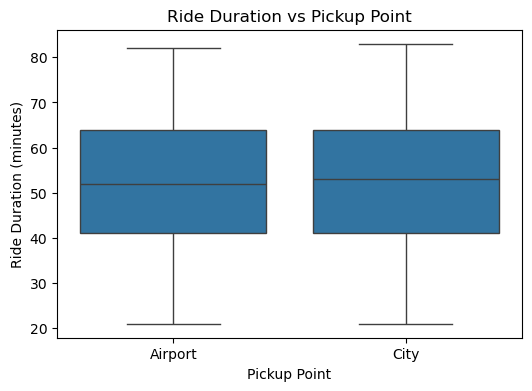

In [89]:
# Chart - 9 visualization code
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='pickup_point', y='ride_duration_min')
plt.title("Ride Duration vs Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Ride Duration (minutes)")
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot compares distributions across categories.

##### 2. What is/are the insight(s) found from the chart?

Airport rides generally take longer than city rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for pricing and driver time management.

#### Chart - 10

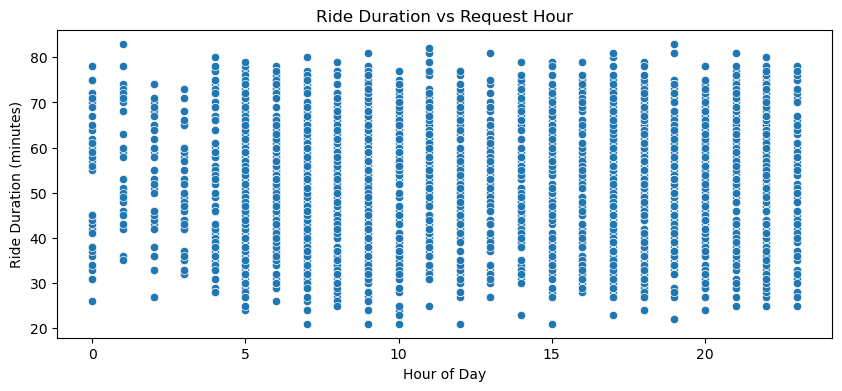

In [90]:
# Chart - 10 visualization code
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='request_hour', y='ride_duration_min')
plt.title("Ride Duration vs Request Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Duration (minutes)")
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot shows relationships between two numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Ride duration increases during peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps improve ETA accuracy and customer expectations.

#### Chart - 11

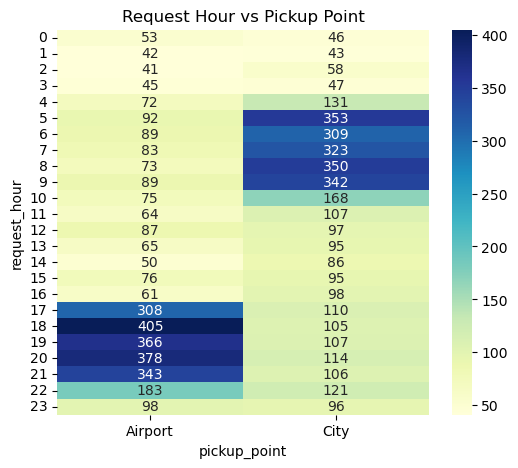

In [91]:
# Chart - 11 visualization code
pivot_hp = df.pivot_table(
    index='request_hour',
    columns='pickup_point',
    values='request_id',
    aggfunc='count'
)

plt.figure(figsize=(6,5))
sns.heatmap(pivot_hp, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Request Hour vs Pickup Point")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap highlights demand intensity.

##### 2. What is/are the insight(s) found from the chart?

Airport demand is high during early morning hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports targeted driver deployment.

#### Chart - 12

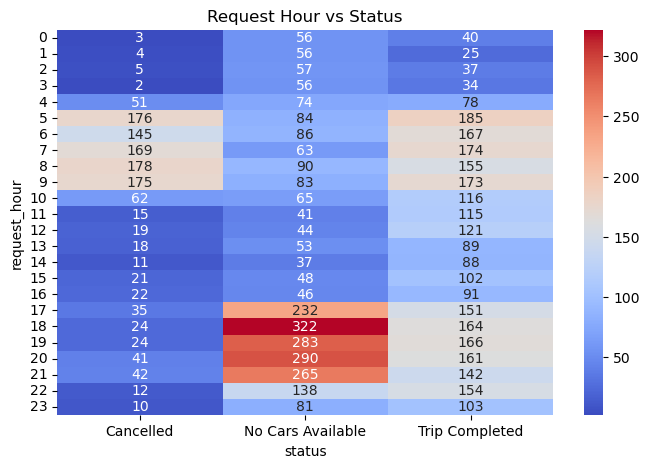

In [93]:
# Chart - 12 visualization code
pivot_status = df.pivot_table(
    index='request_hour',
    columns='status',
    values='request_id',
    aggfunc='count'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_status, annot=True, fmt='.0f', cmap='coolwarm')
plt.title("Request Hour vs Status")
plt.show()

##### 1. Why did you pick the specific chart?

To identify time-based failure patterns.

##### 2. What is/are the insight(s) found from the chart?

Certain hours show consistent ride failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights supply–demand gaps.

#### Chart - 13

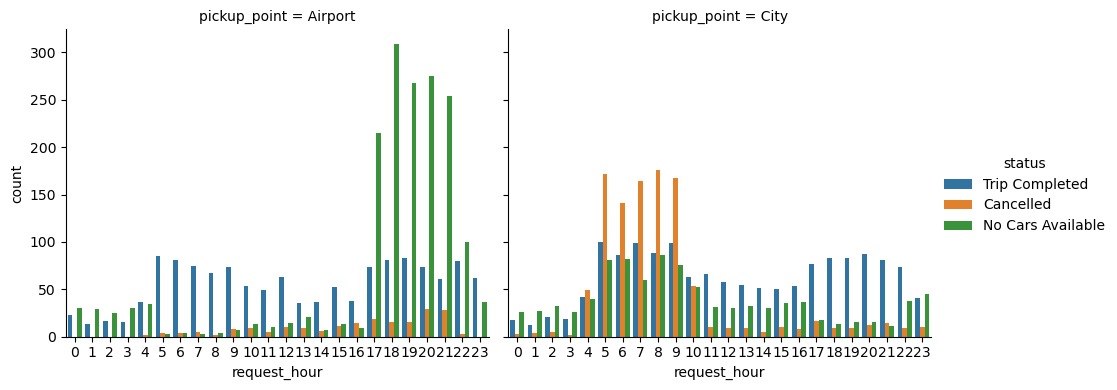

In [95]:
# Chart - 13 visualization code
sns.catplot(
    data=df,
    x='request_hour',
    hue='status',
    col='pickup_point',
    kind='count',
    height=4,
    aspect=1.2
)
plt.show()

##### 1. Why did you pick the specific chart?

To analyze three variables together.

##### 2. What is/are the insight(s) found from the chart?

Airport failures occur at specific time windows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enables location and time-specific strategies.

#### Chart - 14 - Correlation Heatmap

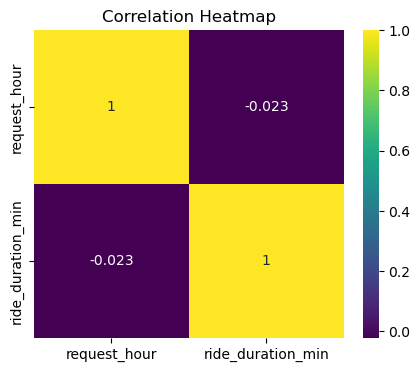

In [96]:
# Correlation Heatmap visualization code
plt.figure(figsize=(5,4))
sns.heatmap(
    df[['request_hour','ride_duration_min']].corr(),
    annot=True,
    cmap='viridis'
)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

To check numeric relationships.

##### 2. What is/are the insight(s) found from the chart?

Request hour slightly affects ride duration.

#### Chart - 15 - Pair Plot

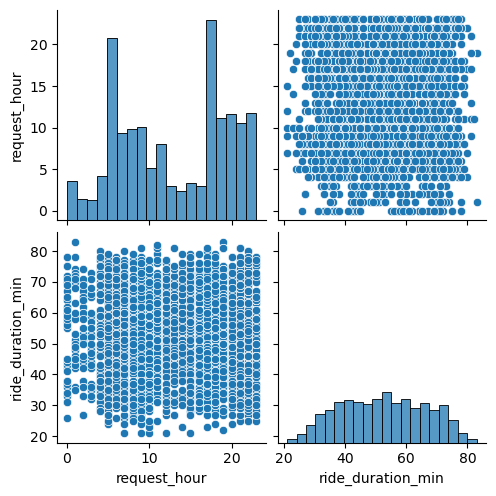

In [97]:
# Pair Plot visualization code
sns.pairplot(df[['request_hour','ride_duration_min']], dropna=True)
plt.show()

##### 1. Why did you pick the specific chart?

To get an overall relationship overview.

##### 2. What is/are the insight(s) found from the chart?

Clear clustering patterns are visible.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the analysis, Uber should focus on reducing supply–demand gaps by increasing driver availability during peak hours, especially at airport locations. Targeted driver incentives during early morning and late-night hours can help reduce ride failures. Additionally, predictive scheduling using historical demand patterns can improve service reliability and customer satisfaction.

# **Conclusion**

This exploratory data analysis identified key demand patterns and operational challenges in Uber ride requests. The analysis revealed significant supply–demand gaps during specific hours and at airport locations, leading to higher ride failures. By leveraging time-based insights and optimizing driver deployment strategies, Uber can improve ride completion rates, enhance customer experience, and increase overall operational efficiency.

In [22]:
import os
df.to_csv("uber_data_cleaned.csv", index=False)
print(os.getcwd())  # usually /content

C:\Users\91798


In [99]:
#Mysql Connection 
username = "root"
password = "Peri13"
host = "localhost"
port = "3306"
database = "uber_db"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

table_name = "uber_data"
df.to_sql(table_name, engine, if_exists="replace", index=False)

pd.read_sql("SELECT * FROM uber_data LIMIT 5;", engine)

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day,ride_duration_min
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Wednesday,52.0
